In [106]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter

#data = pd.read_csv('listings.csv.gz', nrows=1000, compression='gzip', error_bad_lines=False)
#data.head()

data_complete = pd.read_csv('SF_listings.csv', nrows=1000, error_bad_lines=False)

data_complete.fillna(0, inplace=True)

price = data_complete['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

data_complete['price']=prices

In [135]:


data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24
5,8567,https://www.airbnb.com/rooms/8567,20181206023014,2018-12-06,Lovely 2BR flat Great Location,0,"Fully furnished 2BR, 1BA flat in beautiful Vic...","Fully furnished 2BR, 1BA flat in beautiful Vic...",none,"The neighborhood is very centrally located, cl...",...,t,STR-0000278,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,0.27
6,8739,https://www.airbnb.com/rooms/8739,20181206023014,2018-12-06,"Mission Sunshine, with Private Bath","Welcome to San Francisco's Mission District, t...","Your sunny room has a queen size bed, and look...","Welcome to San Francisco's Mission District, t...",none,Located between Valencia Street and Dolores Pa...,...,t,STR-0000028,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,2,5.54
7,9225,https://www.airbnb.com/rooms/9225,20181206023014,2018-12-06,Artful Potrero Separate Floor with Garden,A Unique Guest Suite! A Spacious Art Filled ...,"It is unique, very spacious [800 sq. ft. with...",A Unique Guest Suite! A Spacious Art Filled ...,none,"It is a distinct neighborhood, with easy acces...",...,t,STR-0000179,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,3.91
8,10251,https://www.airbnb.com/rooms/10251,20181206023014,2018-12-06,Victorian Suite in Inner Mission,0,Please read this before you book! Second floor...,Please read this before you book! Second floor...,none,"Neighborhood is safe, sunny, lively and fun. ...",...,t,STR-0001558,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,2.73
9,10578,https://www.airbnb.com/rooms/10578,20181206023014,2018-12-06,Classic Nob Hill Studio - Roof Deck,A cute studio with nice street views and lots ...,"Features: Elevator, Wood floors, TV, DVD Play...",A cute studio with nice street views and lots ...,none,"Very centrally located. Fishermans Wharf, Chi...",...,t,0,"{""SAN FRANCISCO""}",f,f,moderate,f,t,1,0.21


In [108]:
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [136]:
#create a dataframe with desired columns/values

SF_listing_df = data_complete[['id','host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
SF_listing_df

,id,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0
5,8567,25601,f,Western Addition/NOPA,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,255.0,1,0,5,5,20,31,90.0,9.0
6,8739,7149,t,Mission District,San Francisco,CA,Condominium,Private room,3,1,...,0.0,139.0,2,9,28,49,129,631,98.0,9.0
7,9225,29674,f,Potrero Hill,San Francisco,CA,House,Private room,2,1,...,0.0,135.0,1,20,47,67,342,434,94.0,9.0
8,10251,35199,t,Mission District,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,265.0,1,2,21,51,303,307,96.0,9.0
9,10578,37049,f,0,San Francisco,CA,Apartment,Entire home/apt,2,1,...,0.0,120.0,1,30,60,90,365,18,99.0,10.0


In [137]:
#Columns with Null Values 
#new_listing_df.isna().sum()
#data_complete.drop(['id'], axis=1, inplace=True)

In [138]:
#Clean Column Names
SF_listing_df = SF_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

SF_listing_df.head()

,id,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0


In [263]:
SF_listing_df.fillna(0, inplace=True)

In [264]:
#total number of neighbourhoods where Airbnb has rental listings
SF_neighbourhood_total = len(SF_listing_df["neighbourhood_cleansed"].unique())
SF_neighbourhood_total

35

In [265]:
#Breakdown by the number of listings per neighbourhood
SF_neighbourhoods = SF_listing_df.loc[:,"neighbourhood_cleansed"].value_counts()
SF_neighbourhoods.head()

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: neighbourhood_cleansed, dtype: int64

In [266]:
SF_neighbourhoods = pd.DataFrame(SF_neighbourhoods)
SF_neighbourhoods.head()

,neighbourhood_cleansed
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [267]:
SF_neighbourhoods['neighbourhood_cleansed'].sum()

1000

In [268]:
#SF_neighbourhoods=SF_neighbourhoods.drop("Not Specified")

In [269]:
SF_neighbourhoods = SF_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
#SF_neighbourhoods.drop("Not Specified")
#SF_neighbourhoods.drop("Not Specified", inplace=True)
#SF_neighbourhoods.dtypes
SF_neighbourhoods.head()

,Number of Listings
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [270]:
#SF_neighbourhoods["Number of Listings"] = SF_neighbourhoods["Number of Listings"].astype(int64)

top_SF_neighbourhoods = SF_neighbourhoods['Number of Listings'][:5]
top_SF_neighbourhoods

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: Number of Listings, dtype: int64

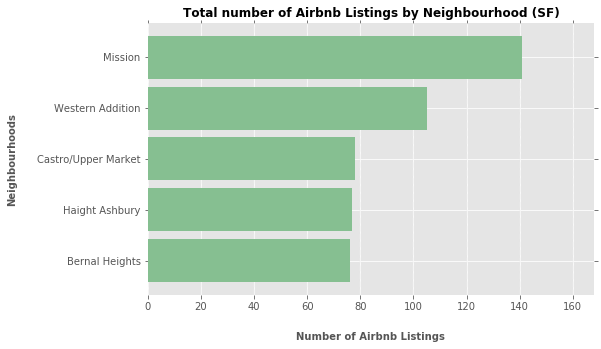

In [271]:
#SF_neighbourhoods.plot.bar()
#ax = top_SF_neighbourhoods.plot.bar(x='Number of Listings',y='Neighbourhoods')


ax = top_SF_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total number of Airbnb Listings by Neighbourhood (SF)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
#ytick value 
#plt.annotate

In [272]:
#Get Top 5 Neighbourhoods
#Group Top 5 Neighbourhoods by Property Type
#Group Top 5 Neighbourhoods by Property Type and Price (Bins) - look at the quantiles (mean, medium) .quantile 


In [326]:
SF_property_type = SF_listing_df["Room Type"].value_counts()
SF_property_type = SF_property_type.reset_index()

SF_property_type = SF_property_type.rename(columns={'index':'Room Type',
                                                   'Room Type': 'Number of Listings'})
SF_property_type

,Room Type,Number of Listings
0,Entire home/apt,639
1,Private room,335
2,Shared room,26


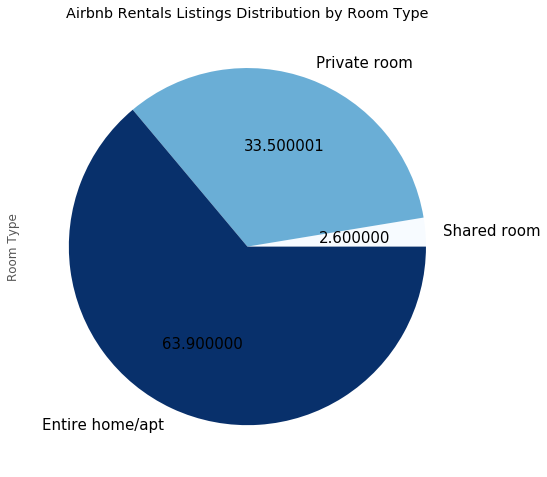

In [316]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = data_complete.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['Room Type']
room_df.plot.pie(y = 'Room Type', 
                 colormap = 'Blues', 
                 figsize=(8,10), 
                 fontsize = 15, autopct = '%2f',
                 legend = False,
                 title = 'Airbnb Rentals Listings Distribution by Room Type')

#make title bold, and text smaller

In [300]:
#Breakdown of Room Types

roomProperty_df = SF_listing_df.groupby(['neighbourhood_cleansed','Room Type']).price.mean()
roomProperty_df = roomProperty_df.reset_index()
roomProperty_df = roomProperty_df.sort_values(by='price', ascending=[0])
roomProperty_df = roomProperty_df.rename(columns={"neighbourhood_cleansed": "Neighbourhood",
                                                 "room_type": "Room Type"})
roomProperty_df.head()

,Neighbourhood,Room Type,price
62,South of Market,Shared room,1283.0
54,Presidio Heights,Entire home/apt,593.5
29,Marina,Entire home/apt,435.0
5,Castro/Upper Market,Entire home/apt,342.0
11,Diamond Heights,Entire home/apt,310.0


In [278]:
roomProperty_df = pd.DataFrame(roomProperty_df)
roomProperty_df.head(5)

,Neighbourhood,Room Type,price
62,South of Market,Shared room,1283.0
54,Presidio Heights,Entire home/apt,593.5
29,Marina,Entire home/apt,435.0
5,Castro/Upper Market,Entire home/apt,342.0
11,Diamond Heights,Entire home/apt,310.0


In [296]:
# neighbourhoods = ['South of Market', 'Presidio Heights', 'Marina', 'Castro/Upper Market', 'Diamond Heights']
# cols = pd.MultiIndex.from_product([neighbourhoods, ['Shared Room', 'Entire home/apt', 'Private Room']])
# roomProperty_df = pd.DataFrame(roomProperty_df['price'], columns=cols)
# roomProperty_df

#HOW TO include a breakdown of all room types and their distribution of avg. prices
#roomProperty_df = data_complete.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending=False)[:5].plot.bar()

#SF_listing_df.groupby('Neighbourhood')['price'].describe()



In [319]:
SF_listing_pivot = SF_listing_df.pivot_table(index='Neighbourhood', columns='Room Type', values='price', aggfunc='mean')
SF_listing_pivot.head()


Room Type,Entire home/apt,Private room,Shared room
Neighbourhood,,,
0,253.921875,106.903226,311.0
Alamo Square,331.555556,82.000000,NaN
Balboa Terrace,147.500000,81.250000,NaN
Bayview,127.000000,67.666667,NaN
Bernal Heights,204.813953,99.428571,79.0


In [320]:
SF_listing_pivot.fillna(0, inplace=True)
SF_listing_pivot.head()

Room Type,Entire home/apt,Private room,Shared room
Neighbourhood,,,
0,253.921875,106.903226,311.0
Alamo Square,331.555556,82.000000,0.0
Balboa Terrace,147.500000,81.250000,0.0
Bayview,127.000000,67.666667,0.0
Bernal Heights,204.813953,99.428571,79.0


In [321]:
SF_listing_pivot = SF_listing_pivot.iloc[1:]
SF_listing_pivot.head()

#should group by total number of listings to break down the prices of the top neighburhoods in SF

Room Type,Entire home/apt,Private room,Shared room
Neighbourhood,,,
Alamo Square,331.555556,82.000000,0.0
Balboa Terrace,147.500000,81.250000,0.0
Bayview,127.000000,67.666667,0.0
Bernal Heights,204.813953,99.428571,79.0
Chinatown,244.666667,0.000000,30.0
